In [70]:
import numpy as np
from datascience import *
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn import *
from sklearn.model_selection import train_test_split
from datetime import datetime, timezone
import missingno as msno
import seaborn as sns
import math




In [159]:
Trial1Con = pd.read_csv("Trial1Con.csv")
Trial2Con = pd.read_csv("Trial2Con.csv")
Trial3Con = pd.read_csv("Trial3Con.csv")

Trial1Ox = pd.read_csv("trial1ox.csv")
Trial2Ox = pd.read_csv("trial2ox.csv")
Trial3Ox = pd.read_csv("trial3ox.csv")
Trial3Con

,Timestamp,AccelLnX,AccelLNY,AccelLNZ,AccelWRX,AccelWRY,AccelWRZ,GyroX,GyroY,GyroZ,MagX,MagY,MagZ,EventMarker,Unnamed: 14
0,1.658851e+12,-6.195652,-0.423913,0.750000,-8.892879,-2.456014,-1.170557,-0.847805,-2.064885,0.063812,1.013493,0.769115,0.418291,0,NaN
1,1.658851e+12,-6.228261,-0.413043,0.706522,-8.971873,-2.458408,-1.172950,-0.618798,-1.835878,-0.455272,0.997001,0.772114,0.416792,-1,NaN
2,1.658851e+12,-6.260870,-0.413043,0.739130,-9.002992,-2.467983,-1.184919,-0.572996,-1.698473,-0.607944,1.007496,0.769115,0.421289,-1,NaN
3,1.658851e+12,-6.260870,-0.413043,0.728261,-9.000598,-2.436864,-1.144225,-1.153149,-0.706107,-0.775883,1.007496,0.769115,0.421289,-1,NaN
4,1.658851e+12,-6.347826,-0.434783,0.739130,-9.098743,-2.477558,-1.172950,-1.229485,0.072519,-1.417104,1.011994,0.773613,0.418291,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33427,1.658852e+12,-4.010870,-2.760870,-1.978261,-6.388989,-5.110712,-3.983244,12.662094,28.906966,-4.515148,0.872564,0.850075,0.541229,-1,NaN
33428,1.658852e+12,-4.543478,-2.902174,-2.021739,-7.198085,-5.347696,-4.193896,15.746064,24.815363,-3.492247,0.878561,0.868066,0.536732,-1,NaN
33429,1.658852e+12,-4.663043,-2.945652,-1.978261,-7.293836,-5.395572,-4.090963,16.753698,23.960401,-2.637285,0.863568,0.857571,0.541229,-1,NaN
33430,1.658852e+12,-4.793478,-3.108696,-2.054348,-7.437463,-5.505685,-4.227409,17.623927,22.937500,-2.057133,0.863568,0.859070,0.539730,-1,NaN


In [160]:
Trial1Con['Timestamp'] = (Trial1Con['Timestamp']-Trial1Con._get_value(0, 'Timestamp'))/1000
Trial2Con['Timestamp'] = (Trial2Con['Timestamp']-Trial2Con._get_value(0, 'Timestamp'))/1000
Trial3Con['Timestamp'] = (Trial3Con['Timestamp']-Trial3Con._get_value(0, 'Timestamp'))/1000

Trial3Con

,Timestamp,AccelLnX,AccelLNY,AccelLNZ,AccelWRX,AccelWRY,AccelWRZ,GyroX,GyroY,GyroZ,MagX,MagY,MagZ,EventMarker,Unnamed: 14
0,0.000000,-6.195652,-0.423913,0.750000,-8.892879,-2.456014,-1.170557,-0.847805,-2.064885,0.063812,1.013493,0.769115,0.418291,0,NaN
1,0.007812,-6.228261,-0.413043,0.706522,-8.971873,-2.458408,-1.172950,-0.618798,-1.835878,-0.455272,0.997001,0.772114,0.416792,-1,NaN
2,0.015625,-6.260870,-0.413043,0.739130,-9.002992,-2.467983,-1.184919,-0.572996,-1.698473,-0.607944,1.007496,0.769115,0.421289,-1,NaN
3,0.023437,-6.260870,-0.413043,0.728261,-9.000598,-2.436864,-1.144225,-1.153149,-0.706107,-0.775883,1.007496,0.769115,0.421289,-1,NaN
4,0.031249,-6.347826,-0.434783,0.739130,-9.098743,-2.477558,-1.172950,-1.229485,0.072519,-1.417104,1.011994,0.773613,0.418291,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33427,261.148282,-4.010870,-2.760870,-1.978261,-6.388989,-5.110712,-3.983244,12.662094,28.906966,-4.515148,0.872564,0.850075,0.541229,-1,NaN
33428,261.156095,-4.543478,-2.902174,-2.021739,-7.198085,-5.347696,-4.193896,15.746064,24.815363,-3.492247,0.878561,0.868066,0.536732,-1,NaN
33429,261.163907,-4.663043,-2.945652,-1.978261,-7.293836,-5.395572,-4.090963,16.753698,23.960401,-2.637285,0.863568,0.857571,0.541229,-1,NaN
33430,261.171719,-4.793478,-3.108696,-2.054348,-7.437463,-5.505685,-4.227409,17.623927,22.937500,-2.057133,0.863568,0.859070,0.539730,-1,NaN


In [161]:
Trial1Ox['1'] = Trial1Ox['1']*(192.8/9639)
Trial2Ox['1'] = Trial2Ox['1']*(162.6/8129)
Trial3Ox['1'] = Trial3Ox['1']*(235.18/11758)

Trial3Ox

,1,2,3,4,5,6,Unnamed: 6,Unnamed: 7
0,0.000000,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
1,0.020002,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
2,0.040003,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
3,0.060005,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
4,0.080007,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
11754,235.099993,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
11755,235.119995,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
11756,235.139997,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
11757,235.159998,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


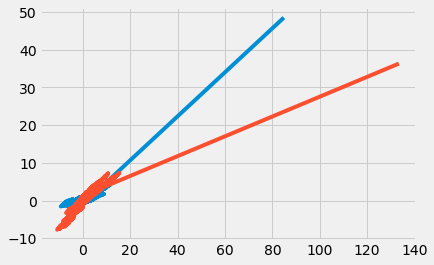

In [74]:
Trial1Ox
plt.plot(Trial1Ox['2'], Trial1Ox['3'], Trial1Ox['4'], Trial1Ox['5'])



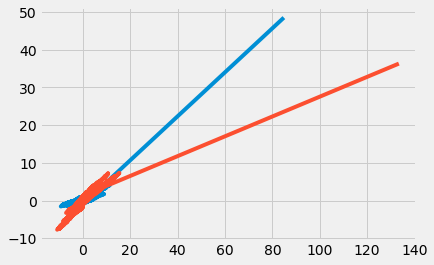

In [75]:
Trial2Ox
plt.plot(Trial2Ox['2'], Trial2Ox['3'], Trial2Ox['4'], Trial2Ox['5'])



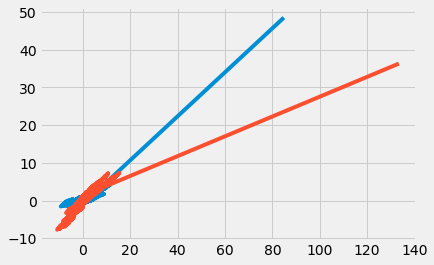

In [76]:
Trial3Ox
plt.plot(Trial3Ox['2'], Trial3Ox['3'], Trial3Ox['4'], Trial3Ox['5'])


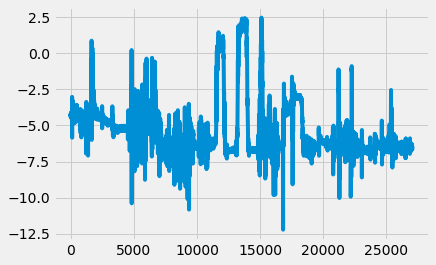

In [77]:
Trial1Con
plt.plot(Trial1Con['AccelLnX'])

In [78]:
columns = ['Timestamp', 'AccelLnX', 'AccelLNY', 'AccelLNZ', 'AccelWRX', 'AccelWRY',
       'AccelWRZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ',
       'EventMarker']
for col in columns:
    print("plt.plot(Trial1Con['" + col  + "'])")

plt.plot(Trial1Con['Timestamp'])
plt.plot(Trial1Con['AccelLnX'])
plt.plot(Trial1Con['AccelLNY'])
plt.plot(Trial1Con['AccelLNZ'])
plt.plot(Trial1Con['AccelWRX'])
plt.plot(Trial1Con['AccelWRY'])
plt.plot(Trial1Con['AccelWRZ'])
plt.plot(Trial1Con['GyroX'])
plt.plot(Trial1Con['GyroY'])
plt.plot(Trial1Con['GyroZ'])
plt.plot(Trial1Con['MagX'])
plt.plot(Trial1Con['MagY'])
plt.plot(Trial1Con['MagZ'])
plt.plot(Trial1Con['EventMarker'])


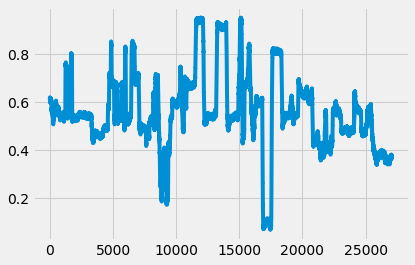

In [79]:
plt.plot(Trial1Con['MagZ'])

In [80]:
Trial2Con_ObjUp = Trial2Con.drop(Trial2Con.index[(Trial2Con['EventMarker'] != 128)])
Trial2Con_ObjUp

,Timestamp,AccelLnX,AccelLNY,AccelLNZ,AccelWRX,AccelWRY,AccelWRZ,GyroX,GyroY,GyroZ,MagX,MagY,MagZ,EventMarker,Unnamed: 14
14592,113.986322,-5.706522,-0.652174,-3.478261,-8.469180,-2.760024,-5.747457,18.678077,-30.716842,26.757872,0.902549,0.695652,0.730135,128,NaN
14593,113.994133,-5.728261,-0.554348,-3.413043,-8.509874,-2.673848,-5.685218,20.067390,-34.701574,26.009781,0.902549,0.695652,0.730135,128,NaN
14594,114.001944,-5.695652,-0.423913,-3.358696,-8.452424,-2.460802,-5.639737,20.540673,-37.190124,25.093750,0.901049,0.704648,0.721139,128,NaN
14595,114.009755,-5.706522,-0.336957,-3.271739,-8.469180,-2.350688,-5.520048,21.212428,-39.755010,24.513597,0.898051,0.691154,0.716642,128,NaN
14596,114.017566,-5.695652,-0.250000,-3.239130,-8.466786,-2.264512,-5.498504,21.059757,-42.457300,24.192987,0.913043,0.692654,0.719640,128,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14829,115.837535,-6.032609,-0.065217,-0.826087,-8.766008,-2.032316,-2.903651,-1.917343,-5.266460,-0.051288,0.977511,0.692654,0.646177,128,NaN
14830,115.845346,-6.010870,-0.043478,-0.847826,-8.756433,-2.051466,-2.870138,-2.405892,-4.991651,-0.066555,0.976012,0.686657,0.641679,128,NaN
14831,115.853157,-6.032609,-0.076087,-0.836957,-8.754039,-2.073010,-2.872531,-2.757037,-4.258826,0.070849,0.976012,0.686657,0.641679,128,NaN
14832,115.860968,-6.076087,-0.119565,-0.869565,-8.830640,-2.116098,-2.903651,-3.031846,-4.289361,0.055582,0.988006,0.686657,0.647676,128,NaN


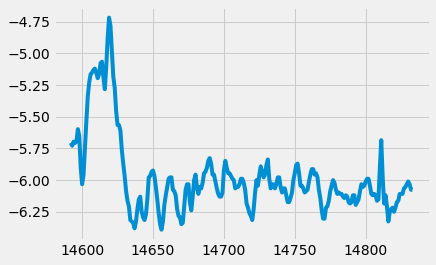

In [81]:
plt.plot(Trial2Con_ObjUp['AccelLnX'])

In [82]:
Trial2ConPlot = Trial2Con.drop(axis = 1, labels = ['EventMarker', 'Timestamp', 'Unnamed: 14'])

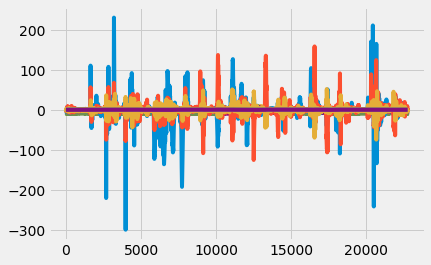

In [83]:
plt.plot(Trial2ConPlot)

In [84]:
#magnitudes:

Trial1Con


#acceLlN:
Trial1ConMagnitudeAccellNY = ((Trial1Con['AccelLnX']**2) + (Trial1Con['AccelLNY']**2) + (Trial1Con['AccelLNZ']**2))**.5
Trial1ConMagnitudeAccelWR = ((Trial1Con['AccelWRX']**2) + (Trial1Con['AccelWRY']**2) + (Trial1Con['AccelWRZ']**2))**.5
Trial1ConMagnitudeGyro = ((Trial1Con['GyroX']**2) + (Trial1Con['GyroY']**2) + (Trial1Con['GyroZ']**2))**.5

Trial2ConMagnitudeAccellNY = ((Trial2Con['AccelLnX']**2) + (Trial2Con['AccelLNY']**2) + (Trial2Con['AccelLNZ']**2))**.5
Trial2ConMagnitudeAccelWR = ((Trial2Con['AccelWRX']**2) + (Trial2Con['AccelWRY']**2) + (Trial2Con['AccelWRZ']**2))**.5
Trial2ConMagnitudeGyro = ((Trial2Con['GyroX']**2) + (Trial2Con['GyroY']**2) + (Trial2Con['GyroZ']**2))**.5

Trial3ConMagnitudeAccellNY = ((Trial3Con['AccelLnX']**2) + (Trial3Con['AccelLNY']**2) + (Trial3Con['AccelLNZ']**2))**.5
Trial3ConMagnitudeAccelWR = ((Trial3Con['AccelWRX']**2) + (Trial3Con['AccelWRY']**2) + (Trial3Con['AccelWRZ']**2))**.5
Trial3ConMagnitudeGyro = ((Trial3Con['GyroX']**2) + (Trial3Con['GyroY']**2) + (Trial3Con['GyroZ']**2))**.5

#plt.plot(Trial1ConMagnitude)

#AccelW:
# def magnitude (trial, type):
#     if(trial == 1):
#         print("reached")
#         return ((Trial1Con.iloc[:, [type]]**2)+(Trial1Con.iloc[:, type+1]**2) + (Trial1Con.iloc[:, type+2]**2) )
#     if(trial == 2):
#         return ((Trial2Con.iloc[:, [type]]**2)+(Trial2Con.iloc[:, type+1]**2) + (Trial2Con.iloc[:, type+2]**2) )
#     if(trial == 3):
#         return ((Trial3Con.iloc[:, [type]]**2)+(Trial3Con.iloc[:, type+1]**2) + (Trial3Con.iloc[:, type+2]**2))
#     else:
#         print("error, invalid input")

In [85]:
Trial1ConMagnitudeAccellNY

0        5.599398
1        5.554475
2        5.541709
3        5.466873
4        5.625921
           ...   
27057    6.745868
27058    6.727637
27059    6.733141
27060    6.730894
27061    6.709208
Length: 27062, dtype: float64

In [86]:
Trial3ConMagnitudeGyro

0         2.233069
1         1.990133
2         1.892811
3         1.558953
4         1.877518
           ...    
33427    31.879897
33428    29.596225
33429    29.355450
33430    28.999370
33431    28.832614
Length: 33432, dtype: float64

In [87]:
round((Trial1Con['Timestamp']-Trial1Con._get_value(0, 'Timestamp'))/7.812012)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
27057    27.0
27058    27.0
27059    27.0
27060    27.0
27061    27.0
Name: Timestamp, Length: 27062, dtype: float64

In [88]:
Trial2Con._get_value(22748, 'Timestamp') - Trial2Con._get_value(0, 'Timestamp')

177.69306054687499

<AxesSubplot:xlabel='AccelLnX'>

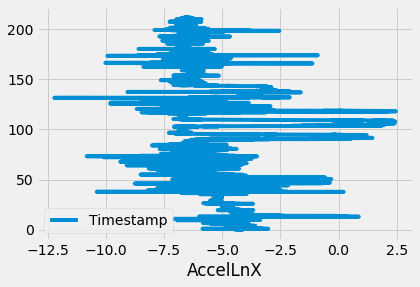

In [89]:
# Trial1Con['AccelLnX'].plot(figsize=(20,4), x=Trial1Con['Timestamp'])
Trial1Con.plot('AccelLnX', 'Timestamp')

# Trial1Con.plot(subplots=True, figsize=(15,6))
# Trial1Con.plot(y=["R", "F10.7"], figsize=(15,4))
# Trial1Con['AccelLnX'].plot(x="Timestamp", style='.')

In [90]:
Trial1ConV2 = Trial1Con.set_index('Timestamp')
Trial2ConV2 = Trial2Con.set_index('Timestamp')
Trial3ConV2 = Trial3Con.set_index('Timestamp')

Trial1OxV2 = Trial1Ox.set_index('1')
Trial2OxV2 = Trial2Ox.set_index('1')
Trial3OxV2 = Trial3Ox.set_index('1')

Trial1OxV2

,2,3,4,5,6,Unnamed: 6,Unnamed: 7
1,,,,,,,
0.000000,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
0.020002,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
0.040004,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
0.060006,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
0.080008,84.857025,48.528526,133.385651,36.328503,NaN,NaN,NaN
...,...,...,...,...,...,...,...
192.719992,-6.380692,-0.235757,-6.616349,-6.144935,NaN,NaN,NaN
192.739994,-6.447954,-0.247565,-6.695420,-6.200389,NaN,NaN,NaN
192.759996,-6.463326,-0.256364,-6.719590,-6.206963,NaN,NaN,NaN


In [98]:
# msno.matrix(Trial1ConV2)
# Trial1Con.loc[df['column_name'] == some_value]

def eventIndices(trialDF):
    resultingValues = []
    resultingIndices = []
    result = [resultingValues, resultingIndices]


    if 'EventMarker' in trialDF:
        temp = -1
        eventV = trialDF['EventMarker']
        for i in range(len(eventV)):
            if eventV.iloc[i] != 0:
                if eventV.iloc[i] != -1 and eventV.iloc[i]!=temp:
                    resultingValues.append(eventV.iloc[i])
                    resultingIndices.append(i)
                    temp = eventV.iloc[i]
                elif eventV.iloc[i] != temp and eventV.iloc[i-1] == temp:
                    resultingValues.append(eventV.iloc[i-1])
                    resultingIndices.append(i)
        
    if '6' in trialDF:
        eventV = trialDF['6']            
        for i in range(len(eventV)):
            if type(eventV.iloc[i]) != float:
                resultingIndices.append(i)
                resultingValues.append(eventV.iloc[i])
        
    return result

    

In [99]:
# plot_cols = ['GyroX', 'GyroZ']
# plot_cols2 = ['MagY', '3']

# fig, axes = plt.subplots(2,1, figsize=(25,7), sharex=True)
# Trial1ConV2[['GyroX']].plot(subplots=True, ax=axes, layout = (1,2))
# for ax in axes:
#     ax.axvspan(12, 15, color=sns.xkcd_rgb['grey'], alpha=0.5)
#     ax.axvspan(12, 15,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
# Trial1OxV2[['3', '4']].plot(subplots=True, ax=axes)
# for ax in axes:
#     ax.axvspan(12, 15, color=sns.xkcd_rgb['grey'], alpha=0.5)
#     ax.axvspan(12, 15,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
    
# Trial2ConV2.plot(subplots=True, layout=(1,2))
eventIndices(Trial1OxV2)

[['A1 ',
  'B1 ',
  'C1 ',
  'D1 ',
  'C2 ',
  'D2 ',
  'B2 ',
  'E1 ',
  'F1 ',
  'G1 ',
  'H1 ',
  'I1 ',
  'J1 ',
  'A2 ',
  'K1 ',
  'L1 '],
 [2075,
  2525,
  3775,
  4475,
  5275,
  5475,
  5625,
  5925,
  6275,
  6575,
  6825,
  7225,
  7625,
  8025,
  8425,
  8625]]

In [181]:
def timeSeriesPlot(df1, col1, df2, col2):
    FPL_cols = [col1, col2]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25,7), sharex=True)
#     Trial1Con[FPL_cols[0]].plot(subplots=True, ax=axes)
#     Trial1ConV2[FPL_cols[0]].plot(subplots=True)
#     Trial1OxV2[FPL_cols[1]].plot(subplots = True)
    
    
    ax1.plot(df1[FPL_cols[0]])
    ax1.set_ylabel(col1)
    ax2.plot(df2[FPL_cols[1]])
    ax2.set_ylabel(col2)

    
#     for ax in axes:
#         ax.axvspan(200, 3000, color=sns.xkcd_rgb['grey'], alpha=0)
#         ax.axvspan(200, 3000,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
    
    Trial1Con['EventMarker']


In [182]:
# type(Trial1OxV2._get_value(0, '6'))

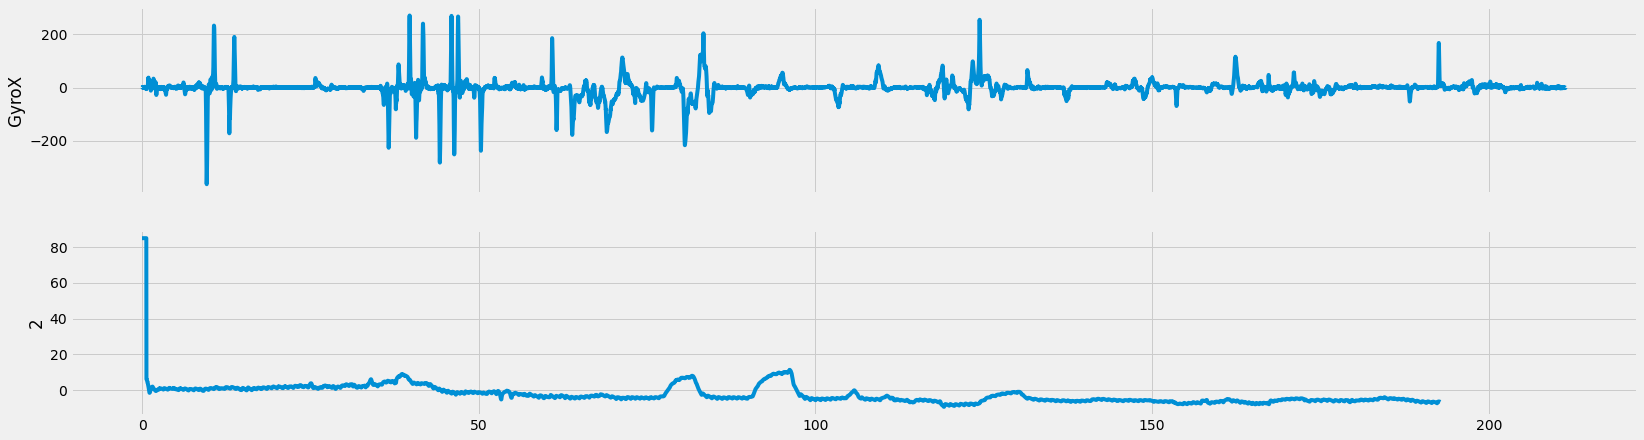

In [183]:
timeSeriesPlot(Trial1ConV2, 'GyroX', Trial1OxV2, '2')

In [162]:
Trial1ConV2['GyroX']

Timestamp
0.000000      0.449785
0.007812      0.449785
0.015625      0.739862
0.023437      1.274213
0.031249      1.228411
                ...   
211.378562   -0.572996
211.386374   -0.634065
211.394186   -0.679866
211.401999   -1.168416
211.409811   -0.695134
Name: GyroX, Length: 27062, dtype: float64